Lets start by loading required packages and reading from the data file!

In [1]:
import csv
import cv2
import numpy as np 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

# 1 radian to degree
radian_to_degree = 57.3

lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)


Lets read the steering angles and plot histogram of the given data (corresponding to track 1) assuming only center images.

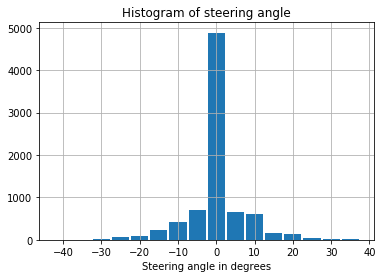

In [2]:
steering_angles = []
# Only load the images given with the project
for line in lines[1:8038]:
    # steering angles in degrees
    measurement = radian_to_degree*float(line[3])
    steering_angles.append(measurement)

steering_angles = np.array(steering_angles)
plt.hist(steering_angles, bins = np.arange(-42.5, 42.5, 5), rwidth = 0.9, align = 'mid')
plt.title("Histogram of steering angle")
plt.xlabel('Steering angle in degrees')
plt.grid(True)
plt.show()


Clearly the data is biased and ~0 steering angles dominate. Also because the track has more left turns, negative angles are better represented than positive angles. Let us include the left and right images and add 0.25 and -0.25 corrections (in radians) respectively. Additionally, lets flip the images and the corresponding steering angles and add them to the dataset. 

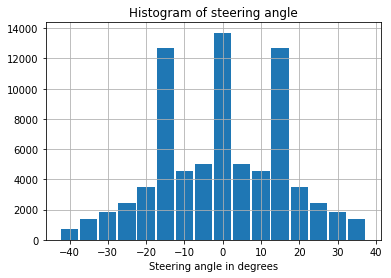

In [3]:
steering_angles = []
# converting radians to degrees
correction = radian_to_degree*np.array([0, 0.25, -0.25])
for line in lines[1:]:
    for i in range(3):
        # steering angle in degrees
        measurement = radian_to_degree*float(line[3]) + correction[i]
        steering_angles.append(measurement)
        steering_angles.append(-1*steering_angles[-1])
        
steering_angles = np.array(steering_angles)
plt.hist(steering_angles, bins = np.arange(-42.5, 42.5, 5), rwidth = 0.9, align = 'mid')
plt.title("Histogram of steering angle")
plt.xlabel('Steering angle in degrees')
plt.grid(True)
plt.show()

Better -  but still if the model is trained on this dataset, it would tend to learn the three steering angles - -0.25, 0 and 0.25. The car being driven by a neural network learning these values may veer from side to side and won't be driving as smooth as humans. To fix it, consider horizontal translations to balance the dataset. Note that I also consider other image augmentation techniques (for e.g., brightness augmentation & adding shadow to images) for generalization, but these don't affect the steering angles and thus are not presented here.

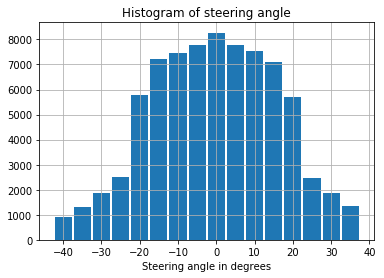

In [8]:
# image processing
def translate_image(angle, translate_range_hor):
    dx = np.random.randint(-translate_range_hor//2, translate_range_hor//2)
    angle = angle + dx * 0.0025 * radian_to_degree
    return angle

def perturb_image_helper(angle):
    translate_range_hor = 100 # translate range in pixels
    angle = translate_image(angle, translate_range_hor)
    return angle

steering_angles = []
# converting radians to degrees
correction = radian_to_degree*np.array([0, 0.25, -0.25])
for line in lines[1:]:
    for i in range(3):
        # steering angle in degrees
        measurement = radian_to_degree*float(line[3]) + correction[i]
        steering_angles.append(perturb_image_helper(measurement))
        steering_angles.append(perturb_image_helper(-1.0*measurement))
        
steering_angles = np.array(steering_angles)
plt.hist(steering_angles, bins = np.arange(-42.5, 42.5, 5), rwidth = 0.9, align = 'mid')
plt.title("Histogram of steering angle")
plt.xlabel('Steering angle in degrees')
plt.grid(True)
plt.show()

Now the histogram has a nice Gaussian representation with 0 mean.